In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('L:/analysis_nima/Python Scripts') #changing directory to ETL.py folder

from Analyses_ import ETL
from Analyses_ import Plot
from Analyses_ import activation
from Analyses_ import run_per_mouse
from Analyses_ import raster_plot
from Analyses_ import run_per_mouse_concatinated
from Analyses_ import epoch_duration
from Analyses_ import Triplet
from Analyses_ import findseq
from Analyses_ import select_subpopulation
from Analyses_ import transition
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.__version__
import copy

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Inputs

###  Defining artifacts

In [2]:
# defining artifacts
custom_artifacts_1 = [[11007,11008,4]]
custom_artifacts_2 = [[11630,11947,0],[12000,12700,0],[4533,5154,14]]
custom_artifacts_3 = []
custom_artifacts_4 = [[1595,1845,0],[4609,4907,0],[7740,7983,0],[13795,14101,0],[16706,16973,0],
             [7266,7501,1],[11912,12219,1],[12703,13203,1],[13730,13909,1],[15097,15559,1],[17277,17519,1],
             [1416,1793,2],[3816,4123,2],[13254,13593,2],[15224,15703,2],[17668,18067,2],
             [7358,7521,3],[10240,10253,3],[13672,13748,3],[17306,17593,3],
             [5505,5939,4],[6222,6231,4],[16760,16820,4],[18450,18573,4],                           
             [1132,1357,7],[8653,8776,7],[9946,10391,7],
             [9068,9323,7],[13589,13623,7],[17394,17547,7],
             [1,140,8],[908,965,8],[7638,7665,8],[8014,8027,8],[14726,14922,8],[18022,18187,8],
             [1912,2381,9],[2920,2923,9],[7767,7819,9],[7864,7997,9],[9876,10197,9],[15206,15545,9],
             [6734,7220,10],[9668,9939,10],
             [8914,9290,11],[9562,9571,11],[12216,12339,11],
             [11492,11553,12],[13898,13919,12],
             [6298,6619,13],[12282,12795,13],[14406,14507,13],[14798,14875,13],
             [1,220,14],[1878,2108,14],[9872,9961,14],
             [4764,4813,15],[5564,5571,15],[15419,15595,15],[16003,16089,15],[16420,16482,15],
             [4240,4403,16],[9975,10077,16],[10274,10275,16],[13228,13451,16],[13805,13939,16],[14620,14664,16],[15764,15857,16],[18430,18537,16],
             [10425,10591,17],[11058,11709,17],[12232,12311,17],[12784,12804,17],[17000,17115,17],
             [10655,10825,18],[11993,12075,18],[12648,12685,18],[16013,16134,18],
             [14466,15015,19],[16876,17009,19],[18398,18573,19],
            [628,958,23],[7822,7976,23],[10298,10435,23],[13899,14241,23],[14466,14537,23],[15773,15848,23],[17664,17925,23],[18291,18426,23],
            [4309,4512,24],[5271,5467,24],[6450,6700,24],[7186,7593,24],
            [460,700,25],[1714,1725,25],[4045,4153,25],[13600,13699,25],
            [4434,4568,26],[5984,6167,26],
            [1770,1831,27],[4060,4064,27],
            [2000,2193,28],[11098,11334,28],
            [5921,5997,30],[8200,8210,30],[9189,9191,30],
            [686,852,31],[13375,13543,31],[14059,14334,31],[15808,15883,31],
            [10760,10800,33],[13942,14061,33],[17672,17738,33],
            [10576,10604,41]]
custom_artifacts_5 = [[3928,3971,0],[4584,4656,0],[7001,7119,0],[14144,14230,0],[14466,14501,0],[15591,15593,0],
            [559,603,1],[2187,2214,1],[3999,4054,1],[11749,11790,1],[17785,17839,1],
            [3403,3491,2],[11936,11980,2],
            [1397,1465,3],[13881,13889,3],[14510,14526,3],[18377,18441,3],                                                                                           
            [2585,2635,4], [6722,6771,4],[10867,10897,4],[16543,16615,4],
            [740,825,5],[2026,2113,5],[13025,13051,5],
            [798,863,6],[1795,1857,6],[3949,3980,6],[5190,5244,6],[10480,10547,6],[11219,11301,6],[12144,12191,6],[12690,12747,6],
            [1343,1441,7],[2618,2684,7],[2709,2713,7],[3427,3496,7],[4138,4185,7],[4532,4567,7],[5694,8768,7],[9513,9562,7],[12510,12644,7],[15000,15073,7],
            [96,140,8],[4175,4258,8],
            [409,564,9],[13291,13497,9],[16520,18573,9],
            [9968,10026,10],[14269,14335,10],[16569,16616,10],
            [404,557,11],[12553,12649,11],
            [503,598,13],[2832,2889,13],[13151,13218,13],[18276,18343,13],
            [769,954,14],[980,1001,14],[2324,2389,14],[4286,4297,14],
            [3349,3447,15],[6128,6221,15],
            [8475,8543,16],
            [9792,9840,17],
            [2984,3007,20],[4131,4183,20],[5025,5042,20],[6330,6355,20],[11818,11893,20],
            [6760,6875,21],
            [12871,12895,28],[13645,13667,28],[14232,14319,28],[14837,14849,28],[15521,15542,28],[16421,16445,28],[17032,17040,28]]
custom_artifacts_6 = [[8863,9191,4],
           [5389,5393,7],[5575,5607,7],[5754,5755,7],[5798,6000,7],
            [11050,11070,10],[12260,12280,10],
            [15125,15290,12],[16420,18160,10],
            [13280,13340,13],
            [8,23,15],[92,94,15],[481,505,15],
            [10035,10500,20],[11024,11044,20],
            [5794,5800,21],
            [3501,3507,22]]
custom_artifacts_7 = [[0,3418,0],[13116,13507,0],[14502,14872,0],
              [8000,9000,2],
              [1828,2638,3],[8631,12630,3],
              [1497,1988,4],[16470,17270,4],
              [5113,8239,5],                                                                                         
              [2322,2978,6],
              [12460,14890,7],
              [15600,16060,10],
              [4231,4848,11],[6434,6909,11],[9110,11550,11],
              [11890,12380,12],
              [8410,8820,13],
              [3026,3515,14],[13810,14170,14],
              [10910,12010,15]]               

### removing cells

In [3]:
remove_cell_1 = []
remove_cell_2 = []
remove_cell_3 = [62,63,64,65,66,67,68,69,70,80,81,160,161,162,163,164,167,194,195,202,203,204]
remove_cell_4 = [13,53,55,57,79,84,85,86,95,99,112,141,144,147,153,177,178,183,184,188,189,191,196,197,198,199,202,219,226,234,235]
remove_cell_5 = []
remove_cell_6 = [66,84,85,86]
remove_cell_7 = []

### sampling frequency

In [4]:
# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576]

### data address

In [5]:
all_address = ['L:/analysis_nima/250520_m18a/Batch_4', 'L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2',
                'L:/analysis_nima/110620_m18b/new/Batch_3', 'L:/analysis_nima/050820_m21a/Batch_4',
                'L:/analysis_nima/030720_m20a/Batch_3', 'L:/analysis_nima/291020_m23a/Batch_2',
               'L:/analysis_nima/210121_m24a/Batch_1']

In [6]:
# adress for saving final picture
picture_adress = False # address or False

# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576]

# list of artifacts for mice 
artifacts = [custom_artifacts_1, custom_artifacts_2, custom_artifacts_3,
            custom_artifacts_4, custom_artifacts_5, custom_artifacts_6]

# list of cells need to be removed
remove_cell = [remove_cell_1, remove_cell_2, remove_cell_3,
              remove_cell_4, remove_cell_5, remove_cell_6]

# average firing rate and average amplitude analyses

In [7]:
average_all = [run_per_mouse_concatinated(sf_=sfs[i], ending_='.mat', unit_lenght_=600, address_= all_address[i], set_artifacts_=artifacts[i], fr_zeros = False) for i in range(len(sfs))]

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18597, 45) and Data 

L:\analysis_nima\Python Scripts\Analyses_.py:155: RuntimeWarning: invalid value encountered in true_divide
  axis = 0) / np.sum(np.where(data_sws > 0, 1, 0), axis = 0)
L:\analysis_nima\Python Scripts\Analyses_.py:168: RuntimeWarning: invalid value encountered in true_divide
  1, 0), axis = 0)
L:\analysis_nima\Python Scripts\Analyses_.py:183: RuntimeWarning: invalid value encountered in true_divide
  axis = 0) / np.sum(np.where(data_awake > 0, 1, 0), axis = 0)


output = sws, rem , awake
output = sws, rem , awake
Your entered path is L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat']  Number of all files 31
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 294 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18597, 31) and Data shape (18597, 294, 31)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 294, 31)
setting artif

output = sws, rem , awake
output = sws, rem , awake
Your entered path is L:/analysis_nima/030720_m20a/Batch_3
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 185 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18597, 29) and Data shape (18597, 185, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 185, 29)
setting artifacts for file 0
Artifact indices will be appl

output = sws, rem , awake
output = sws, rem , awake
Your entered path is L:/analysis_nima/291020_m23a/Batch_2
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat']  Number of all files 23
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18574 samples, number of cells are 87 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18574, 23) and Data shape (18574, 87, 23)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23)
setting artifacts for file 4
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23)
setting artifacts for file

### sub-population

In [13]:
sub_pop_index = []
based_on = 0 # you have to provide index (index_order: sws_fr, rem_fr, awake_fr, sws_amp, rem_amp, awake_amp)
#                                                   # 0     , 1     , 2       , 3      , 4      , 5
percentage = 15
Type = 'top'
    
for i, mouse in enumerate(average_all):
    sub_pop_index.append(select_subpopulation(avg_data=average_all[i][based_on], 
                                                        type_=Type, percentage_=percentage))

1 NaNs exist in selected indices and will be removed.
1 NaNs exist in selected indices and will be removed.
1 NaNs exist in selected indices and will be removed.
1 NaNs exist in selected indices and will be removed.
3 NaNs exist in selected indices and will be removed.


# Epoch Length correlation to Firirng Rate

### single mouse

In [31]:
# initializing ETL
mouse_nr = 2

ETL_ = ETL(sf=sfs[mouse_nr], ending='.mat', unit_length=600)

# giving file or files path
ETL_.get_path(all_address[mouse_nr])

# loading all files to ETL memory
ETL_.load_files()

# getting hypno signals for all files
Hypno_ = ETL_.get_hypno()

# getting full data set
full_dataset = ETL_.get_data_values()

print(f'Hypno shape {Hypno_.shape} and Data shape {full_dataset.shape}')

custom_artifacts = artifacts[mouse_nr]
# setting artifact period
if len(custom_artifacts)!=0:
        for art in custom_artifacts:
            ETL_.set_artifact(start_= art[0], end_= art[1], file_= art[2]) # start and end should be based on sampling index

# getting artifacts
data_artifacts, hypno_artifacts = ETL_.get_artifacts()
print(f'data artifact shape {data_artifacts.shape}, hypno_artifact shape {hypno_artifacts.shape}')

Your entered path is L:/analysis_nima/110620_m18b/new/Batch_3
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat']  Number of all files 26
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 218 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 26) and Data shape (18573, 218, 26)
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 218, 26), hypno_artifact shape (18573, 26)


In [32]:
duration_address = False

# cell removal
cell_rm = remove_cell[mouse_nr]
sub_pop_apply = True # or True


################ preparing data in advance ######################
Hypnos = np.hstack(Hypno_.T)
Data = np.hstack(full_dataset.T).T

Hypnos_art = np.hstack(hypno_artifacts.T)
Data_art = np.hstack(data_artifacts.T).T
################################################################

if sub_pop_apply:
    sub_pop_ind = np.delete(sub_pop_index[mouse_nr], np.in1d(sub_pop_index[mouse_nr], cell_rm))
    
    Data = Data[:, sub_pop_ind]
    Data_art = Data_art[:, sub_pop_ind]
else:
    Data = np.delete(Data, cell_rm, axis = 1)
    Data_art = np.delete(Data_art, cell_rm, axis = 1)
    
    


# loading necessary data to epoch_duration class (we concatincate units in one mouse)
epoch_dur_ = epoch_duration(hypnos=Hypnos, data=Data, 
                            data_artifact=Data_art, hypno_artifact=Hypnos_art,
                            sf=sfs[mouse_nr], save_address = duration_address)


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
L:\analysis_nima\Python Scripts\Analyses_.py:829: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:856: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:857: RuntimeWarning: Mean of empty slice
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0

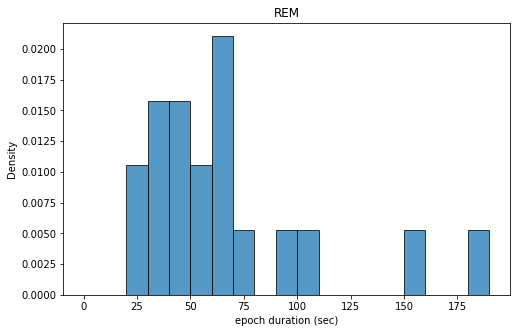

In [33]:
# Histogram of epoch durations in specific state
epoch_dur_.plot_duration(figsize_=(8,5), state_name='REM',
                        kde_=True, range_=np.arange(0,200,10))

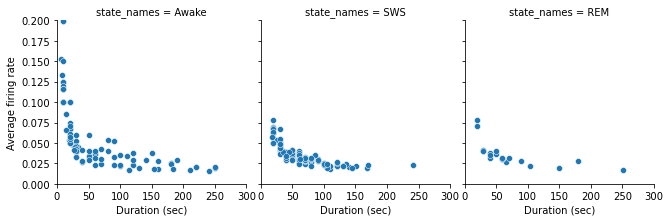

In [24]:
# relation between epoch duration and average firing rate per state
epoch_dur_.plot_duration_correlation(with_zero=False, xlim_ = (0,300), ylim_ = (0,0.2))

### Running epoch duration and relation analyses on several mice
here we load data in loop then concatinate them and then run epoch analyses

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Artifact indices will be applied 

L:\analysis_nima\Python Scripts\Analyses_.py:842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0])

*************************     MOVING TO NEXT    *************************
Your entered path is L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat']  Number of all files 31
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 294 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 294, 31)
Artifact indices will be applied on Location, A

L:\analysis_nima\Python Scripts\Analyses_.py:842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0])

*************************     MOVING TO NEXT    *************************
Your entered path is L:/analysis_nima/110620_m18b/new/Batch_3
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat']  Number of all files 26
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 218 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
output = data_artifacts, hypno_artifacts


L:\analysis_nima\Python Scripts\Analyses_.py:842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0])

*************************     MOVING TO NEXT    *************************
Your entered path is L:/analysis_nima/050820_m21a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat', 'unit46.mat']  Number of all files 46
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno file

L:\analysis_nima\Python Scripts\Analyses_.py:842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0])

*************************     MOVING TO NEXT    *************************
Your entered path is L:/analysis_nima/030720_m20a/Batch_3
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 185 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 185, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 185, 29)
A

L:\analysis_nima\Python Scripts\Analyses_.py:842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0])

*************************     MOVING TO NEXT    *************************
Your entered path is L:/analysis_nima/291020_m23a/Batch_2
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat']  Number of all files 23
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18574 samples, number of cells are 87 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23

L:\analysis_nima\Python Scripts\Analyses_.py:842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state_names[df.state == -2] = 'SWS'
L:\analysis_nima\Python Scripts\Analyses_.py:869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_with_zero[i] = np.nanmean(avg_)
L:\analysis_nima\Python Scripts\Analyses_.py:870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_firing_rate_without_zero[i] = np.nanmean(avg_[avg_>0])

*************************     MOVING TO NEXT    *************************
DISTRIBUTION OF EPOCHS DURATION 




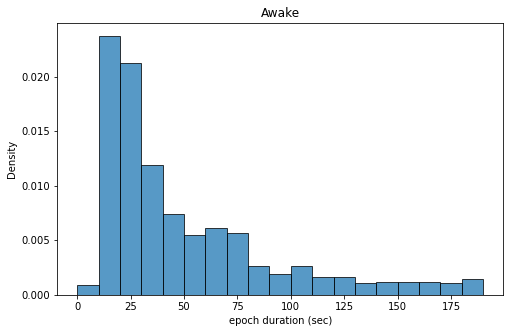

RELATION BETWEEN AVERAGE FIRING RATE AND EPOCH DURATION 




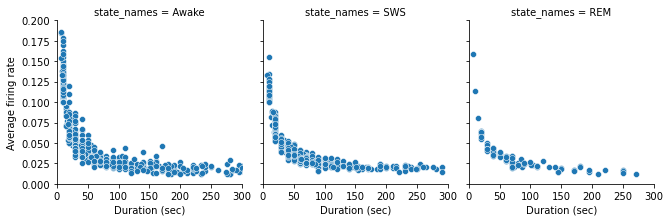

In [9]:
df = pd.DataFrame() # initializing data frame
sub_pop_apply = False # or True
# adress for saving final picture
picture_adress = False # address or False

ro = 0 # do not touch
for address, sf, arts, rm_cell in zip(all_address, sfs, artifacts, remove_cell):
    # initializing ETL
    ETL_ = ETL(sf=sf, ending='.mat', unit_length=600)

    # giving file or files path
    ETL_.get_path(address)

    # loading all files to ETL memory
    ETL_.load_files()

    # getting hypno signals for all files
    Hypno_ = ETL_.get_hypno()

    # getting full data set
    full_dataset = ETL_.get_data_values()
    
    # setting artifact period
    if len(arts)!=0:
        for art in arts:
            ETL_.set_artifact(start_= art[0], end_= art[1], file_= art[2]) # start and end should be based on sampling index


    # getting artifacts
    data_artifacts, hypno_artifacts = ETL_.get_artifacts()
    
    
    ################ preparing data in advance ######################
    Hypnos = np.hstack(Hypno_.T)
    Data = np.hstack(full_dataset.T).T

    Hypnos_art = np.hstack(hypno_artifacts.T)
    Data_art = np.hstack(data_artifacts.T).T
    ################################################################
    
    if sub_pop_apply:
        sub_pop_ind = []
        sub_pop_ind = np.delete(sub_pop_index[ro], np.in1d(sub_pop_index[ro], rm_cell))

        Data = Data[:, sub_pop_ind]
        Data_art = Data_art[:, sub_pop_ind]
    else:
        Data = np.delete(Data, rm_cell, axis = 1)
        Data_art = np.delete(Data_art, rm_cell, axis = 1)

        
        
    ro += 1
     
    epoch_dur_ = epoch_duration(hypnos=Hypnos, data=Data, data_artifact=Data_art, 
                                hypno_artifact=Hypnos_art,
                            sf=sf, save_address = picture_adress)

        
        
    df = df.append(epoch_dur_.get_df(), ignore_index = True)
    
    print('*'*25 , '    MOVING TO NEXT   ', '*'*25)

# loading concatinated dataframes back to class memory for plotting
epoch_dur_.load_df(df)

# giving save address
epoch_dur_.load_pic_save_add(picture_adress)
    
# plotting epoch duration for all mice
print('DISTRIBUTION OF EPOCHS DURATION', '\n\n')
epoch_dur_.plot_duration(figsize_=(8,5), state_name='Awake',
                        kde_=True, range_=np.arange(0,200,10))
plt.show()

# plotting relation of epoch duration
print('RELATION BETWEEN AVERAGE FIRING RATE AND EPOCH DURATION', '\n\n')
epoch_dur_.plot_duration_correlation(with_zero=False, xlim_ = (0,300), ylim_ = (0,0.2))
plt.show()

print('\n'*5)